# OCR Error Analysis

In [169]:

arpa = open('../../evaluation/accuracy/arpa_eval.txt')
gazette = open('../../evaluation/accuracy/gazettemusicale_eval.txt')
harmonicon = open('../../evaluation/accuracy/harmonicon_eval.txt')
menestrel = open('../../evaluation/accuracy/menestrel_eval.txt')
trovatore = open('../../evaluation/accuracy/trovatore_eval.txt')

periodics = [arpa, gazette, harmonicon, menestrel, trovatore]
periodics_eval_line = [558, 187, 40, 859, 218]
all_errors = {}

for i in range(len(periodics)):
    l = periodics[i].readlines()
    lines = l[periodics_eval_line[i]+1:]
    for line in lines:
        line_el = line.split('   ')
        temp_error = tuple([el.lstrip().rstrip() for el in line_el if len(el) > 0])
        if temp_error[3] not in all_errors.keys():
            all_errors[temp_error[3]] = (temp_error[0], temp_error[1])
        else:
            all_errors[temp_error[3]] = ((int(temp_error[0]) + int(all_errors[temp_error[3]][0])), (int(temp_error[1]) + int(all_errors[temp_error[3]][1])))

percentage_error = {}
for k, v in all_errors.items():
    percentage_error[k] = round(((int(v[0]) - int(v[1])) * 100) / int(v[0]), 2)
print(percentage_error)

{'{<\\n>}': 98.04, '{ }': 98.21, '{!}': 89.29, "{'}": 80.09, '{(}': 90.0, '{)}': 94.83, '{,}': 96.11, '{-}': 91.45, '{.}': 91.76, '{0}': 81.4, '{1}': 74.75, '{2}': 77.94, '{3}': 69.23, '{4}': 81.58, '{5}': 80.95, '{6}': 71.43, '{7}': 63.16, '{8}': 84.62, '{9}': 86.67, '{:}': 97.65, '{;}': 94.29, '{=}': 100.0, '{?}': 94.12, '{A}': 87.17, '{B}': 92.78, '{C}': 90.83, '{D}': 86.28, '{E}': 78.89, '{F}': 93.5, '{G}': 94.55, '{H}': 70.83, '{I}': 84.32, '{J}': 75.61, '{K}': 80.0, '{L}': 88.51, '{M}': 90.2, '{N}': 84.59, '{O}': 81.27, '{P}': 87.82, '{Q}': 84.62, '{R}': 83.71, '{S}': 84.64, '{T}': 83.61, '{U}': 65.85, '{V}': 90.97, '{W}': 100.0, '{X}': 55.56, '{Y}': 53.85, '{Z}': 90.7, '{a}': 97.92, '{b}': 96.96, '{c}': 97.34, '{d}': 98.23, '{e}': 97.46, '{f}': 96.49, '{g}': 96.73, '{h}': 97.52, '{i}': 97.29, '{j}': 96.97, '{k}': 81.82, '{l}': 95.49, '{m}': 97.43, '{n}': 97.47, '{o}': 97.67, '{p}': 97.99, '{q}': 97.51, '{r}': 97.59, '{s}': 97.61, '{t}': 97.12, '{u}': 96.69, '{v}': 97.24, '{w}': 

([<matplotlib.axis.YTick at 0x7f91e0e9e220>,
 [Text(0, -446.0, '-446.0'),
  Text(0, 5902.5, '5902.5'),
  Text(0, 12251.0, '12251.0'),
  Text(0, 18599.5, '18599.5'),
  Text(0, 24948.0, '24948.0')])

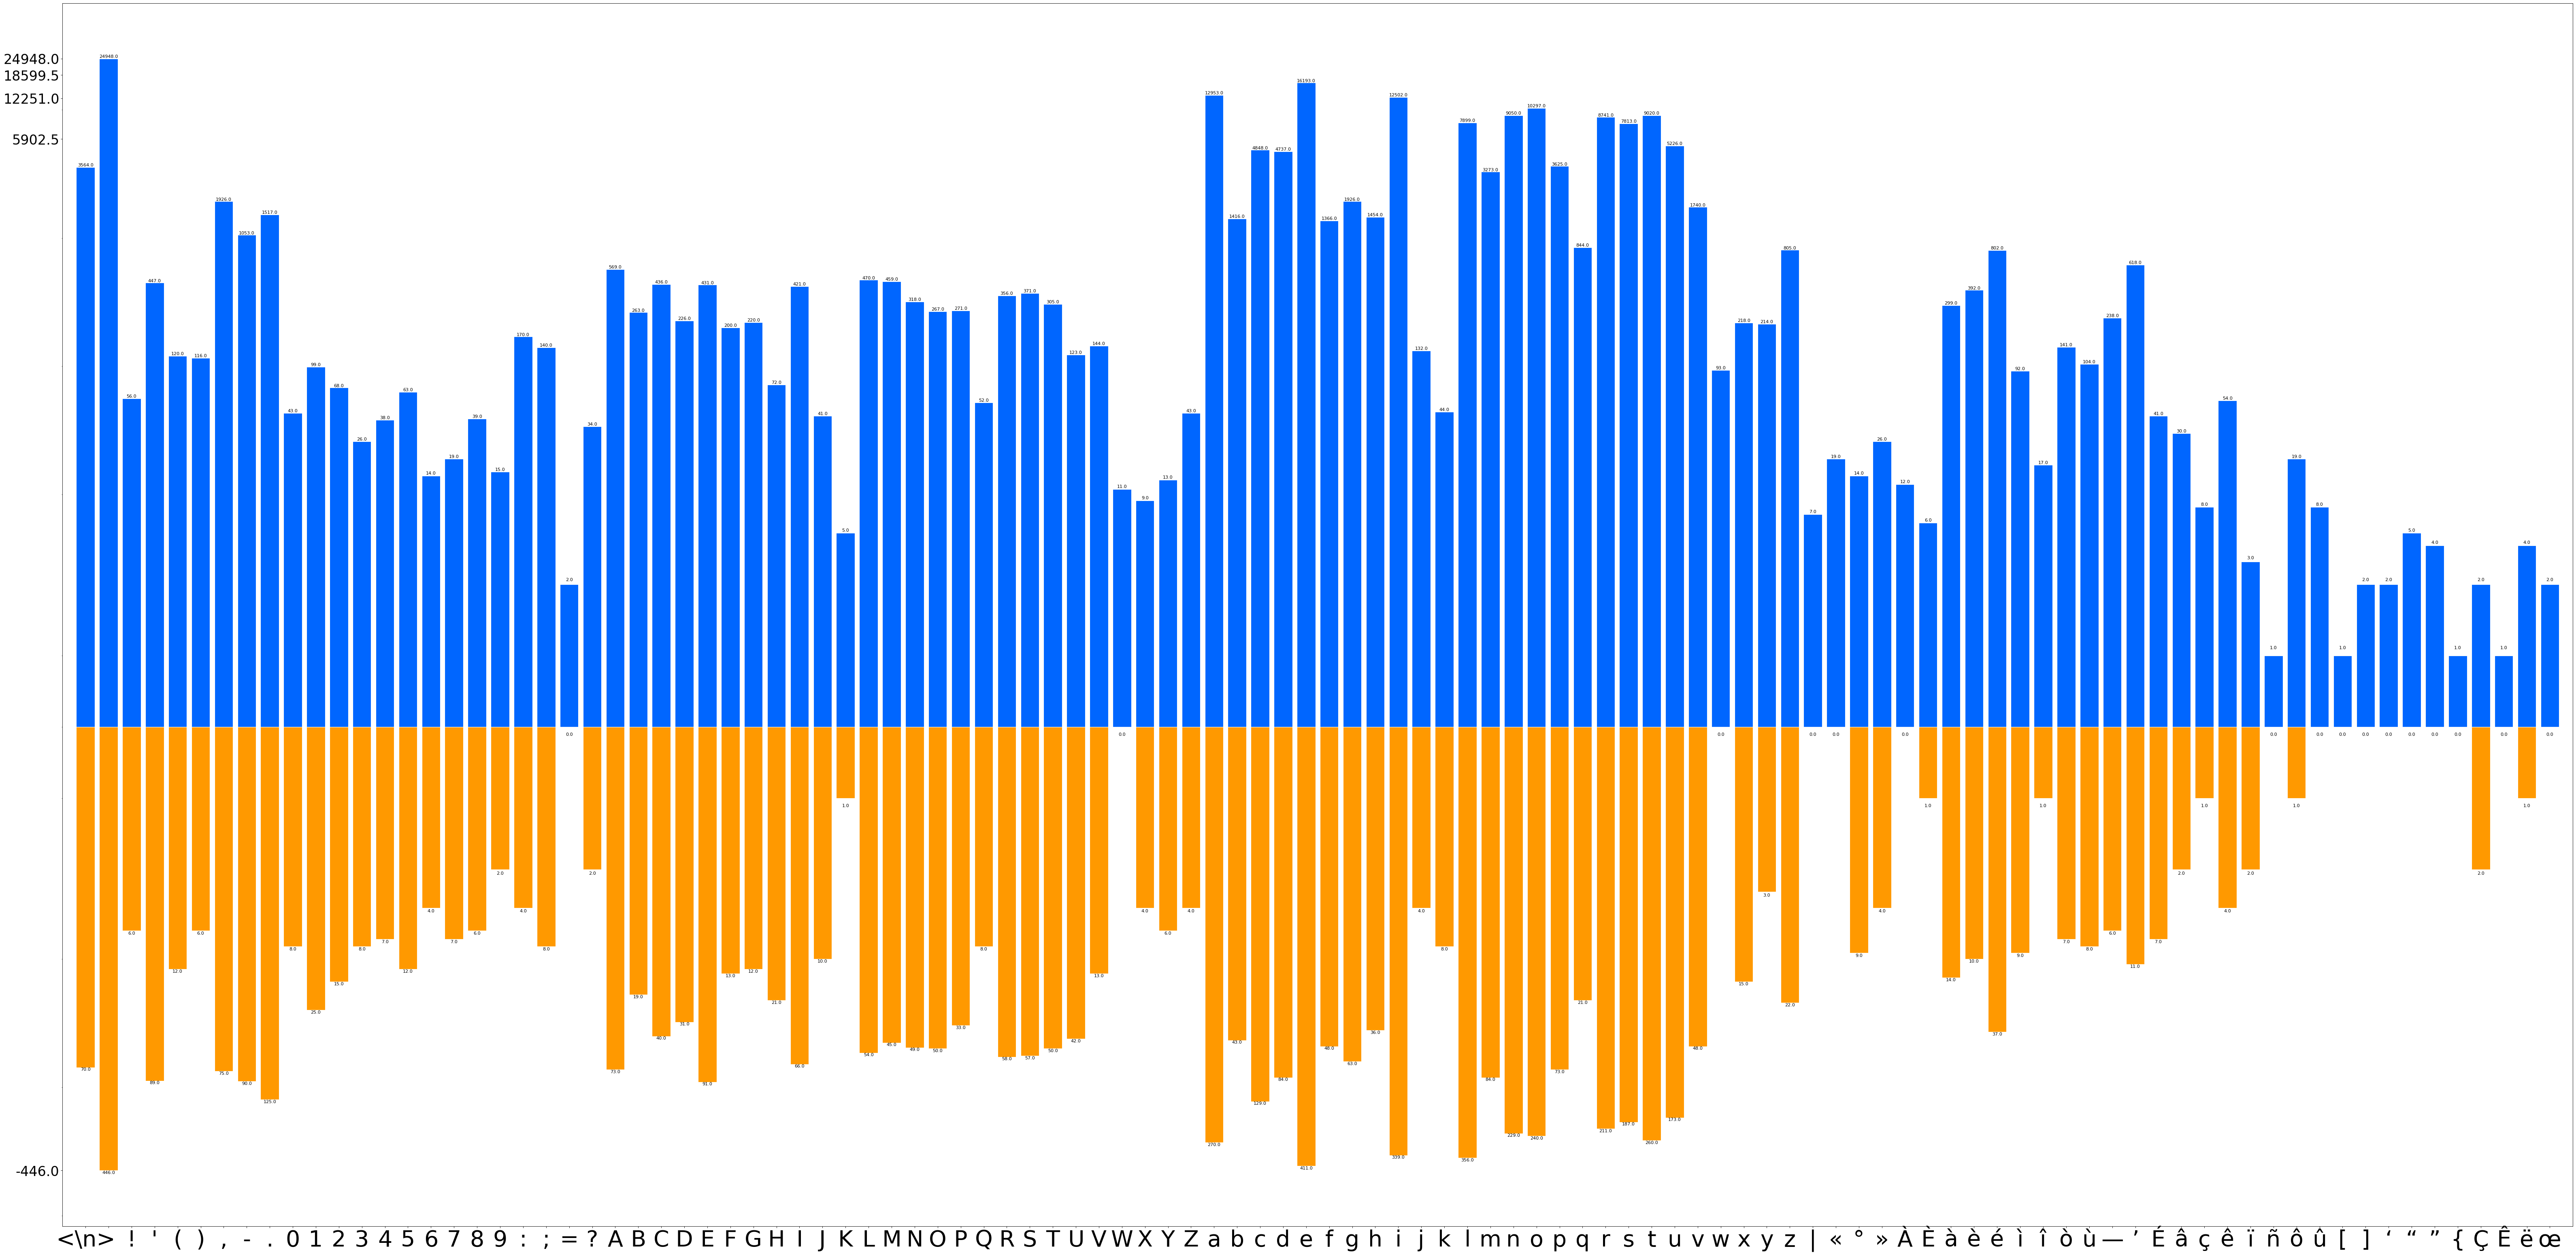

In [170]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 50), dpi=80)

n = len(all_errors.items())
X = np.arange(n)
Y1 = np.array([float(y[0]) for x, y in all_errors.items()])
Y2 = np.array([float(y[1]) for x, y in all_errors.items()])

for x, y in zip(X, Y1):
    plt.text(x, y + 0.08, y, ha='center', va= 'bottom')

for x, y in zip(X, Y2):
    plt.text(x, -y - 0.08, y, ha='center', va= 'top')

plt.bar(X, Y1, facecolor='#0066ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9900', edgecolor='white')
plt.xlim([-1, 108])
plt.yscale('symlog')
plt.xticks(X, [x[1:-1] for x, y in all_errors.items()], fontsize=50)
plt.yticks(np.linspace(-Y2.max(), Y1.max(), 5), np.linspace(-Y2.max(), Y1.max(), 5), fontsize=30)

([<matplotlib.axis.YTick at 0x7f913fbfc190>,
 [Text(0, 0.0, '0.0'),
  Text(0, 5.0, '5.0'),
  Text(0, 10.0, '10.0'),
  Text(0, 15.0, '15.0'),
  Text(0, 20.0, '20.0'),
  Text(0, 25.0, '25.0'),
  Text(0, 30.0, '30.0'),
  Text(0, 35.0, '35.0'),
  Text(0, 40.0, '40.0'),
  Text(0, 45.0, '45.0'),
  Text(0, 50.0, '50.0'),
  Text(0, 55.0, '55.0'),
  Text(0, 60.0, '60.0'),
  Text(0, 65.0, '65.0'),
  Text(0, 70.0, '70.0'),
  Text(0, 75.0, '75.0'),
  Text(0, 80.0, '80.0'),
  Text(0, 85.0, '85.0'),
  Text(0, 90.0, '90.0'),
  Text(0, 95.0, '95.0'),
  Text(0, 100.0, '100.0')])

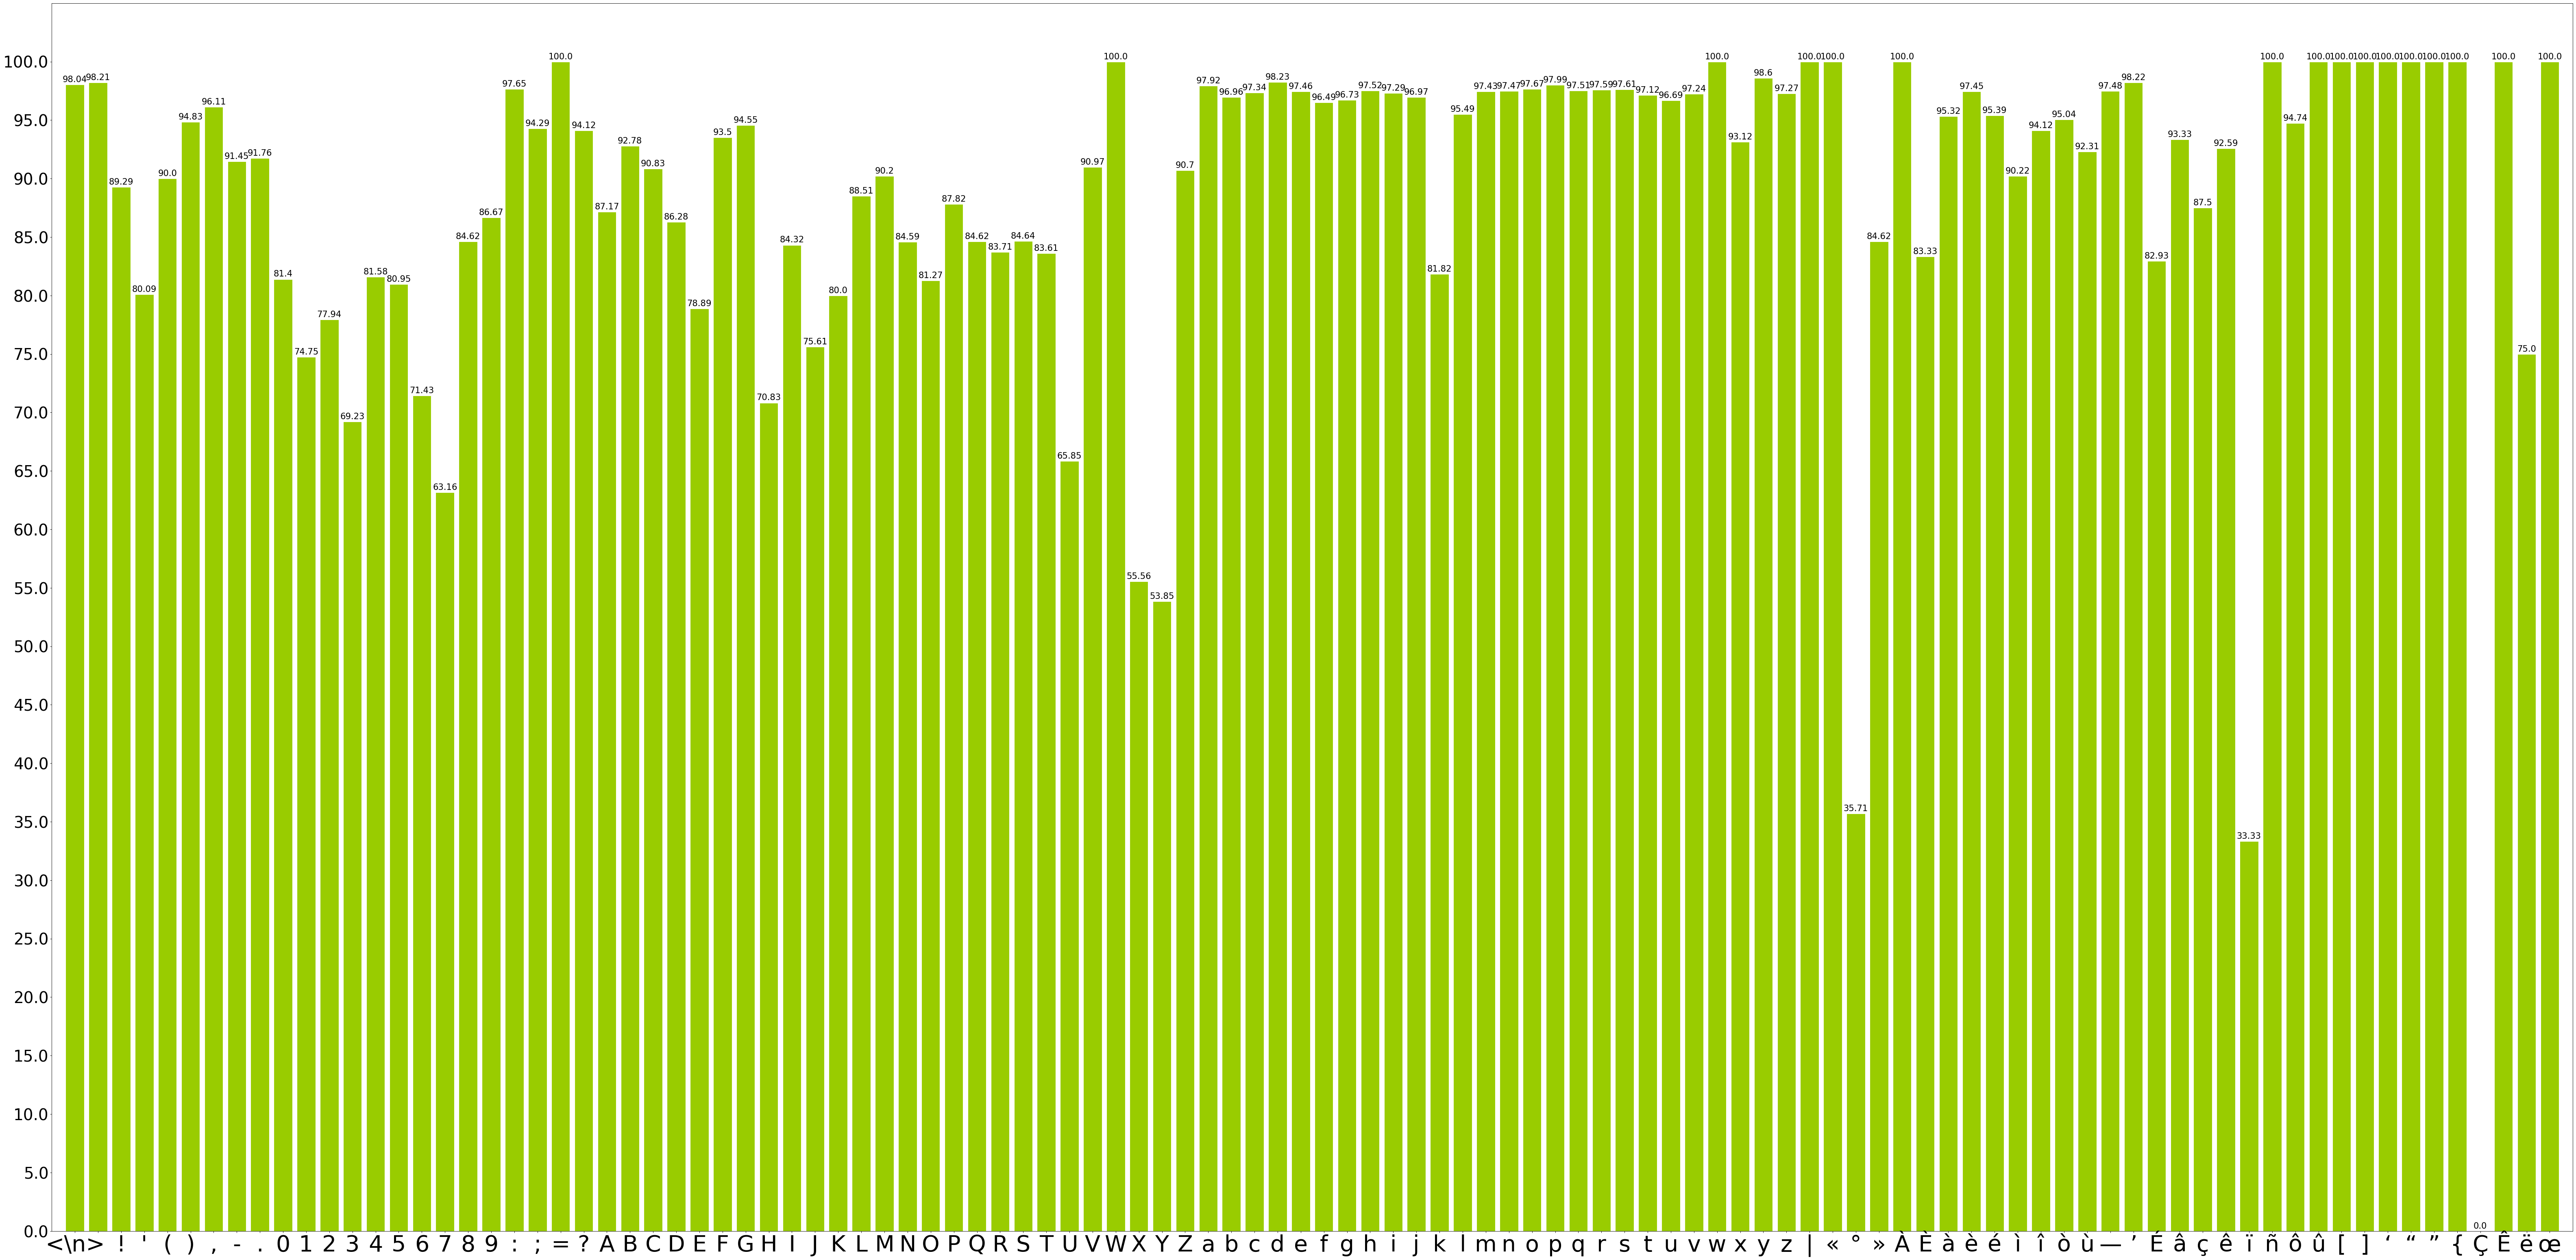

In [171]:
plt.figure(figsize=(100, 50), dpi=80)

n = len(percentage_error.items())
X = np.arange(n)
Y = np.array([float(y) for x, y in percentage_error.items()])

for x, y in zip(X, Y):
    plt.text(x, y + 0.08, y, ha='center', va= 'bottom', rotation=0, fontsize=19)

plt.bar(X, Y, facecolor='#99cc00', edgecolor='white')
plt.xlim([-1, 108])
plt.yscale('linear')
plt.xticks(X, [x[1:-1] for x, y in percentage_error.items()], fontsize=50)
plt.yticks(np.arange(Y.min(), Y.max() + 1, 5), np.arange(Y.min(), Y.max() + 1, 5), fontsize=35)